In [1]:
from __future__ import print_function

import argparse
import os
from multiprocessing import Pool

import utils
import numpy as np
import torch
# from hparams import hp
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.nn.utils import clip_grad_norm
import torchvision.models as models

from data import MiniPlace
#from local import alexnet
import time
import h5py
import transforms
from PIL import Image


ERROR:root:/home/ubuntu/testproject/train/utils/__init__.pyc: failed to import "bullet"


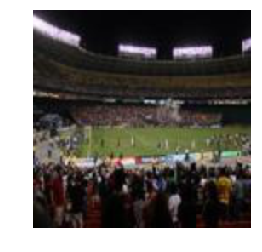

In [19]:
import matplotlib.pyplot as plt
data_path = './preprocess/miniplaces_256_train.h5'
dataset = h5py.File(data_path)
img = dataset['images'][228]
label = dataset['labels'][228]
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
            transforms.Scale(256),
            transforms.RandomCrop(224),
            transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.3, hue=0.1),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            # affine_transforms.Affine(rotation_range=5.0, zoom_range=(0.85, 1.0), fill_mode='constant'),
#            normalize
])

transforms.py:674: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


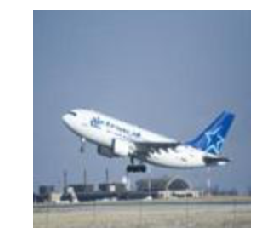

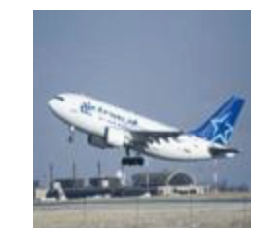

In [4]:
image = Image.fromarray(img)
plt.imshow(img)
plt.axis('off')
plt.show()
image = preprocess(image)
data = image.numpy()
data = np.transpose(data, (1, 2, 0))
plt.imshow(data)
plt.axis('off')
plt.show()